# Natural Breaks

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pandas as pd
from tabulate import tabulate
from scipy import stats

In [11]:
import pandas as pd

# 1. Baca file Excel
df = pd.read_excel("/content/drive/MyDrive/03. Bismillah Skripsi/00. Sidang/03. Data/Hasil Weighted Overlay.xlsx")

# 2. Fungsi kategorisasi
def kategorikan(nilai):
    if nilai < 1.6:
        return "sangat rendah"
    elif 1.6 <= nilai < 2.2:
        return "rendah"
    elif 2.2 <= nilai < 2.9:
        return "sedang"
    elif 2.9 <= nilai < 4:
        return "tinggi"
    else:
        return "sangat tinggi"

# 3. Terapkan ke kolom 'weighted'
df['kategori'] = df['nilai'].apply(kategorikan)

# 4. Simpan hasil ke file baru
output_path = "/content/drive/MyDrive/03. Bismillah Skripsi/00. Sidang/01. Weighted Overlay/01. Hasil_natural breaks_klasifikasi.xlsx"

df.to_excel(output_path, index=False)

# 5. Tampilkan 10 baris pertama
df.head(10)


,fid,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,nilai,klas,ket_klas,kategori
0,1,40582,3471031005,TERBAN,347103,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,GONDOKUSUMAN,4.929381,5.0,Sangat Tinggi,sangat tinggi
1,2,40583,3471041001,SURYATMAJAN,347104,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,DANUREJAN,5.000000,NaN,Tidak Diketahui,sangat tinggi
2,3,40585,3471041003,BAUSASRAN,347104,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,DANUREJAN,4.935919,5.0,Sangat Tinggi,sangat tinggi
3,4,40586,3471051001,SOSROMENDURAN,347105,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,GEDONGTENGEN,5.000000,5.0,Sangat Tinggi,sangat tinggi
4,5,40587,3471051002,PRINGGOKUSUMAN,347105,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,GEDONGTENGEN,5.000000,NaN,Tidak Diketahui,sangat tinggi
5,6,40594,3471081002,SURYODININGRATAN,347108,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,MANTRIJERON,5.000000,5.0,Sangat Tinggi,sangat tinggi
6,7,40595,3471081003,MANTRIJERON,347108,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,MANTRIJERON,4.992755,5.0,Sangat Tinggi,sangat tinggi
7,8,40600,3471101002,PRAWIRODIRJAN,347110,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,GONDOMANAN,5.000000,5.0,Sangat Tinggi,sangat tinggi
8,9,40603,3471121001,KEPARAKAN,347112,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,MERGANGSAN,5.000000,NaN,Tidak Diketahui,sangat tinggi
9,10,40607,3471131002,MUJA MUJU,347113,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,UMBULHARJO,5.000000,5.0,Sangat Tinggi,sangat tinggi


In [12]:
# 6. Summary statistik nilai 'weighted' per Kabupaten/Kota
summary_stats = df.groupby('KAB_KOTA')['nilai'].describe()

# 7. Simpan summary ke file Excel
summary_output_path = "/content/drive/MyDrive/03. Bismillah Skripsi/00. Sidang/01. Weighted Overlay/02. Summary_weighted_per_kabkota.xlsx"
summary_stats.to_excel(summary_output_path)

# 8. Tampilkan hasil summary
print(summary_stats)


                 count      mean       std       min       25%  50%   75%  max
KAB_KOTA                                                                      
BANTUL            75.0  3.286145  1.064977  1.500000  2.450000  3.3  4.15  5.0
GUNUNGKIDUL      144.0  1.718750  0.614392  1.100000  1.300000  1.6  1.90  4.7
KOTA YOGYAKARTA   45.0  4.968759  0.060611  4.762404  4.963436  5.0  5.00  5.0
KULON PROGO       88.0  2.145374  0.586589  1.200000  1.800000  2.0  2.50  4.1
SLEMAN            86.0  3.139535  0.971388  1.300000  2.500000  3.1  3.80  5.0


In [13]:
# 6. Summary statistik nilai 'weighted' per Kabupaten/Kota
summary_stats = df.groupby('KECAMATAN')['nilai'].describe()

# 7. Simpan summary ke file Excel
summary_output_path = "/content/drive/MyDrive/03. Bismillah Skripsi/00. Sidang/01. Weighted Overlay/03. Summary_weighted_per_kecamatan.xlsx"
summary_stats.to_excel(summary_output_path)

# 8. Tampilkan hasil summary
print(summary_stats)


               count      mean       std       min    25%   50%       75%  max
KECAMATAN                                                                     
BAMBANGLIPURO    3.0  3.066667  0.321455  2.700000  2.950  3.20  3.250000  3.3
BANGUNTAPAN      8.0  4.609901  0.284964  4.000000  4.600  4.60  4.703832  5.0
BANTUL           5.0  4.260000  0.433590  3.700000  4.100  4.10  4.700000  4.7
BERBAH           4.0  3.725000  0.639661  3.200000  3.275  3.55  4.000000  4.6
CANGKRINGAN      5.0  1.900000  0.435890  1.400000  1.600  1.80  2.300000  2.4
...              ...       ...       ...       ...    ...   ...       ...  ...
TURI             4.0  2.250000  0.640312  1.700000  1.700  2.20  2.750000  2.9
UMBULHARJO       7.0  4.994777  0.013820  4.963436  5.000  5.00  5.000000  5.0
WATES            8.0  2.600000  0.870140  1.600000  1.975  2.40  3.100000  4.1
WIROBRAJAN       3.0  5.000000  0.000000  5.000000  5.000  5.00  5.000000  5.0
WONOSARI        14.0  2.792857  0.807145  1.700000  

In [14]:
# Hitung jumlah masing-masing kategori
jumlah_per_kategori = df['kategori'].value_counts().reset_index()
jumlah_per_kategori.columns = ['kategori', 'jumlah']

# Tampilkan
print(jumlah_per_kategori)

        kategori  jumlah
0         rendah     114
1  sangat tinggi      90
2  sangat rendah      89
3         tinggi      80
4         sedang      65


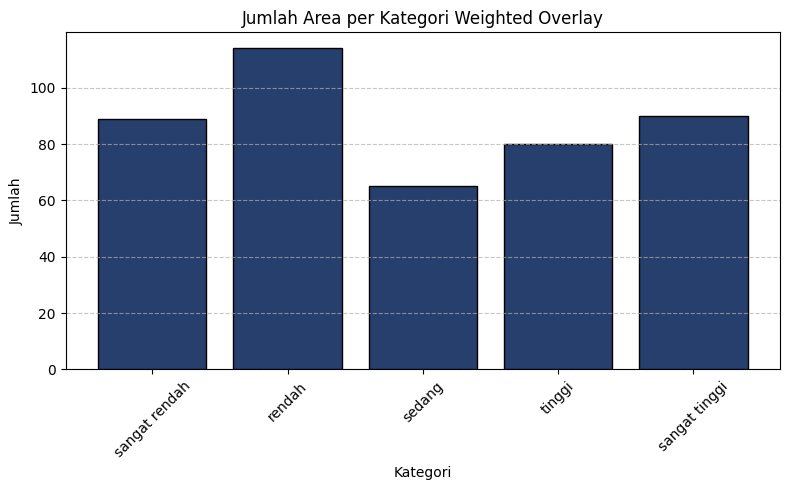

In [15]:
import matplotlib.pyplot as plt

# Urutan kategori agar visual rapi (dari sangat rendah ke sangat tinggi)
urutan = ["sangat rendah", "rendah", "sedang", "tinggi", "sangat tinggi"]
jumlah_per_kategori['kategori'] = pd.Categorical(jumlah_per_kategori['kategori'], categories=urutan, ordered=True)
jumlah_per_kategori = jumlah_per_kategori.sort_values('kategori')

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(jumlah_per_kategori['kategori'], jumlah_per_kategori['jumlah'], color='#273f6c', edgecolor='black')
plt.title('Jumlah Area per Kategori Weighted Overlay')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


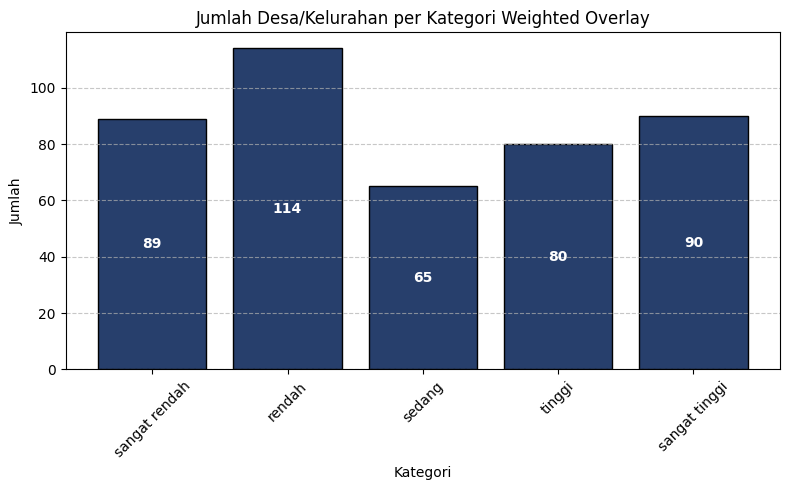

In [16]:
import matplotlib.pyplot as plt

# Urutan kategori agar visual rapi (dari sangat rendah ke sangat tinggi)
urutan = ["sangat rendah", "rendah", "sedang", "tinggi", "sangat tinggi"]
jumlah_per_kategori['kategori'] = pd.Categorical(jumlah_per_kategori['kategori'], categories=urutan, ordered=True)
jumlah_per_kategori = jumlah_per_kategori.sort_values('kategori')

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(jumlah_per_kategori['kategori'], jumlah_per_kategori['jumlah'], color='#273f6c', edgecolor='black')
plt.title('Jumlah Desa/Kelurahan per Kategori Weighted Overlay')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label pada tiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2,  # posisi di tengah bar
             f'{int(height)}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Equal Interval

In [ ]:
import pandas as pd

# 1. Baca file Excel
df = pd.read_excel( '/content/drive/MyDrive/03. Bismillah Skripsi/08. After Semhas OTW Sidang/01. Pengolahan/02. Weighted Overlay/Hasil_equal interval.xlsx')

# 2. Fungsi kategorisasi
def kategorikan(nilai):
    if nilai < 1.88:
        return "sangat rendah"
    elif 1.88 <= nilai < 2.66:
        return "rendah"
    elif 2.66 <= nilai < 3.44:
        return "sedang"
    elif 3.44 <= nilai < 4.22:
        return "tinggi"
    else:
        return "sangat tinggi"

# 3. Terapkan ke kolom 'weighted'
df['kategori'] = df['weighted'].apply(kategorikan)

# 4. Simpan hasil ke file baru
output_path = '/content/drive/MyDrive/03. Bismillah Skripsi/08. After Semhas OTW Sidang/01. Pengolahan/02. Weighted Overlay/Hasil_equal interval_klasifikasi.xlsx'

df.to_excel(output_path, index=False)

# 5. Tampilkan 10 baris pertama
df.head(10)


,Object_Id,Desa,Kab_Kota,Kecamatan,weighted,kategori
0,40582,Terban,Kota Yogyakarta,Gondokusuman,4.929381,sangat tinggi
1,40583,Suryatmajan,Kota Yogyakarta,Danurejan,5.000000,sangat tinggi
2,40585,Bausasran,Kota Yogyakarta,Danurejan,4.935919,sangat tinggi
3,40586,Sosromenduran,Kota Yogyakarta,Gedongtengen,5.000000,sangat tinggi
4,40587,Pringgokusuman,Kota Yogyakarta,Gedongtengen,5.000000,sangat tinggi
5,40594,Suryodiningratan,Kota Yogyakarta,Mantrijeron,5.000000,sangat tinggi
6,40595,Mantrijeron,Kota Yogyakarta,Mantrijeron,4.992755,sangat tinggi
7,40600,Prawirodirjan,Kota Yogyakarta,Gondomanan,5.000000,sangat tinggi
8,40603,Keparakan,Kota Yogyakarta,Mergangsan,5.000000,sangat tinggi
9,40607,Muja Muju,Kota Yogyakarta,Umbulharjo,5.000000,sangat tinggi


In [ ]:
# Hitung jumlah masing-masing kategori
jumlah_per_kategori = df['kategori'].value_counts().reset_index()
jumlah_per_kategori.columns = ['kategori', 'jumlah']

# Tampilkan
print(jumlah_per_kategori)

        kategori  jumlah
0  sangat rendah     151
1         rendah     101
2         sedang      80
3  sangat tinggi      79
4         tinggi      27


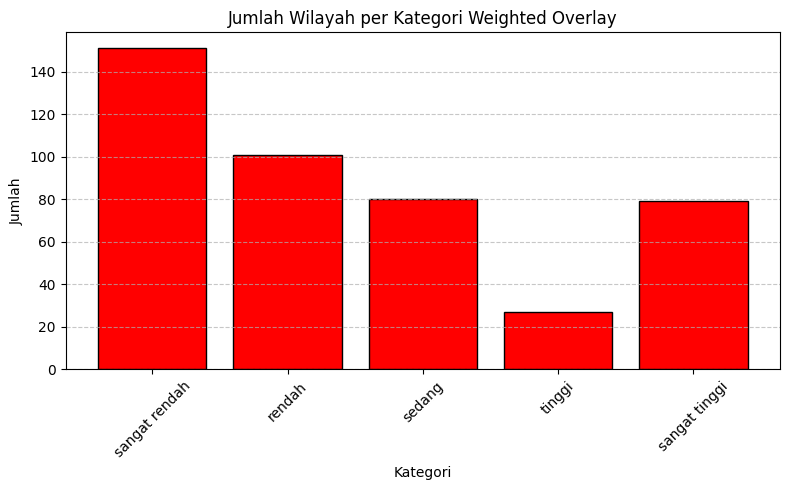

In [ ]:
import matplotlib.pyplot as plt

# Urutan kategori agar visual rapi (dari sangat rendah ke sangat tinggi)
urutan = ["sangat rendah", "rendah", "sedang", "tinggi", "sangat tinggi"]
jumlah_per_kategori['kategori'] = pd.Categorical(jumlah_per_kategori['kategori'], categories=urutan, ordered=True)
jumlah_per_kategori = jumlah_per_kategori.sort_values('kategori')

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(jumlah_per_kategori['kategori'], jumlah_per_kategori['jumlah'], color='red', edgecolor='black')
plt.title('Jumlah Wilayah per Kategori Weighted Overlay')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
